# Unit 5 - Financial Planning

In [270]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [271]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [272]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
print(my_btc)
print(my_eth)

1.2
5.3


In [273]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [274]:
import json
# Fetch current BTC price

# Add format specifier to request url
btc_url = btc_url + "?format=json"
# Execute get request
requests.get(btc_url)
# Execute GET request and store response
response_data = requests.get(btc_url)
# Get content
response_content = response_data.content
data = response_data.json()
json.dumps(data, indent=4)
btc_current_price = data['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
eth_url = eth_url + "?format=json"
requests.get(eth_url)
response_data = requests.get(eth_url)
response_content = response_data.content
data_eth = response_data.json()
json.dumps(data_eth, indent=4)
eth_current_price = data_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto

my_btc_value = round((my_btc * btc_current_price),2)
my_eth_value = round((my_eth * eth_current_price),2)

## Compute current value of my crpto
#add btc and eth values to arrive at crpto total value
crypto =  my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value}")


The current value of your 1.2 BTC is $22989.01
The current value of your 5.3 ETH is $6883.9


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [275]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [276]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [277]:
# Format current date as ISO format
start = pd.Timestamp("2021-09-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# Display sample data
df_portfolio 

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-09-14 04:00:00+00:00,116.07,116.38,116.07,116.28,4183570,15725,116.269163,AGG
2021-09-14 04:00:00+00:00,448.12,448.34,443.22,444.17,77873158,511460,444.979906,SPY


In [278]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])


# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2021-09-14 04:00:00+00:00  116.07  116.38  116.07  116.28  4183570   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2021-09-14 04:00:00+00:00       15725  116.269163  448.12  448.34  443.22   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2021-09-14 04:00:00+00:00  444.17  77873158      511460  444.979906

In [279]:
# Pick AGG and SPY close prices
# create a closing prices data frame
df_closing_prices = pd.DataFrame()

# get the closin prices of AGG and SPY

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]
df_closing_prices.index = df_closing_prices.index.date

agg_close_price = df_closing_prices.iloc[0]['AGG']
spy_close_price = df_closing_prices.iloc[0]['SPY']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.28
Current SPY closing price: $444.17


In [280]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")


The current value of your 50 SPY shares is $22208.50
The current value of your 200 AGG shares is $23256.00


### Savings Health Analysis

In [281]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto =  my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

#total savings divided between Crypto and Shares
asset_value = {'Asset':['Crypto','Shares'], 'Amount':[crypto,shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(data=asset_value)
df_savings = df_savings.set_index("Asset")

# Display savings DataFrame
display(df_savings)


,Amount
Asset,
Crypto,29872.91
Shares,45464.50


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

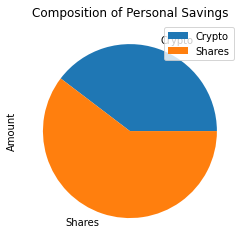

In [282]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [283]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

#Calculate total amount of savings
total_savings = round((crypto + shares),2)

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} away from your financial goal")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [284]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start__date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end__date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [285]:
# Get 5 years' worth of historical data for SPY and AGG


df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start__date,
    end=end__date
).df
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.42,418.2200,416.8111,417.61,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.97,418.1400,416.3000,417.52,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.84,419.0100,416.9000,417.40,50692781,330049,417.742098,SPY


In [286]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

df_stock_data

# Display sample data
df_stock_data.head(2)

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2016-05-02 04:00:00+00:00  110.74  110.740  110.52  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.945  110.75  110.81  3044940   

                                                     SPY                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00       15119  110.627199  206.9  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.5  206.80  205.28   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060

In [287]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30,
)



In [288]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [289]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/05-APIs/Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003702,0.996163,0.997726,1.014655,1.004020,0.997704,0.993645,1.001174,0.999677,1.001745,...,1.013750,0.984613,0.999685,1.004098,0.997822,0.990670,1.009815,0.997959,1.000431,0.985408
2,0.999972,0.990598,1.005569,1.009789,1.012598,1.009828,0.996396,0.993758,0.996529,0.998380,...,1.004820,0.979732,1.001200,1.017524,0.993429,0.993950,1.029655,0.999371,0.995901,0.995028
3,1.004581,0.974193,1.012205,1.024500,1.005782,1.022244,1.003482,0.997412,1.004072,1.012205,...,1.012989,0.975293,0.998879,1.019091,0.991237,0.995595,1.030716,1.005961,0.991861,0.990205
4,1.019812,0.974735,1.014731,1.022208,1.009337,1.024405,0.993742,0.990599,1.008042,1.008221,...,1.013565,0.965584,1.006148,1.023193,1.003084,1.008531,1.042844,1.006907,0.986569,0.987388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.322277,17.624147,14.918138,12.517798,10.355201,17.150845,29.510742,26.586407,14.587854,20.970423,...,49.941887,28.001760,36.308157,27.101249,15.499907,22.631486,81.415321,13.356799,12.764549,39.503962
7557,18.325155,17.620271,14.598387,12.428028,10.446991,17.078279,29.789170,26.789194,14.623608,20.870529,...,50.154468,27.891661,36.564196,27.038946,15.535020,22.498195,82.011299,13.352974,12.772428,39.202132
7558,18.400003,17.715720,14.476610,12.363834,10.386797,17.044780,29.811995,26.611411,14.622762,20.841957,...,50.140283,27.606700,36.640076,26.594573,15.447477,22.442488,81.791001,13.276107,12.834414,38.518446
7559,18.328443,17.531343,14.597215,12.351850,10.326801,17.226420,29.455687,26.217371,14.498176,20.720437,...,50.052766,27.583018,37.078598,26.648404,15.334528,22.304070,81.484640,13.261814,12.776759,38.915456


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

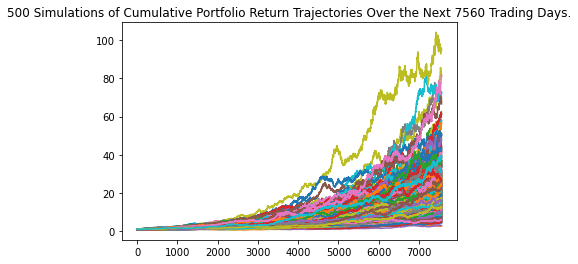

In [290]:
# Plot simulation outcomes

MC_even_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

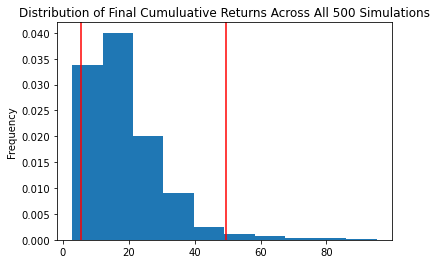

In [291]:
# Plot probability distribution and confidence intervals
MC_even_dist.plot_distribution()

### Retirement Analysis

In [292]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
print(summary)

count           500.000000
mean             18.971827
std              12.058952
min               2.767492
25%              10.814577
50%              15.858088
75%              23.751483
max              95.197970
95% CI Lower      5.329087
95% CI Upper     49.348529
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [293]:
# Set initial investment
initial_investment = 20000

# Print results

print(f"Your initial investment is of ${initial_investment} for 30 years")


Your initial investment is of $20000 for 30 years


In [294]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $106581.74 and $986970.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [295]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $159872.61 and $1480455.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [296]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [297]:
print(df_stock_data)

                              AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.65  3480303   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.3700  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114

In [298]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/05-APIs/Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001123,0.985064,0.996916,0.998898,1.023837,1.002020,0.999908,1.001104,1.005126,1.002264,...,1.001423,0.999418,1.001360,0.997544,1.004631,0.994751,0.999948,0.985045,1.007934,0.999452
2,1.005956,0.990978,0.996919,0.988743,1.030484,0.993288,1.002631,1.009265,1.009781,1.008541,...,1.005915,1.007514,1.003639,0.998753,1.009103,0.987821,0.998051,0.995376,1.003473,0.987711
3,1.004903,0.999369,0.988860,0.983755,1.021103,0.994256,0.996350,1.010563,1.000498,1.008195,...,1.010152,1.014636,0.989868,1.007952,1.008174,0.995932,0.992988,0.986990,1.023389,0.977071
4,1.002716,1.008456,0.980158,0.981441,1.009887,0.989197,1.001256,1.015855,0.997764,1.010601,...,1.014649,1.013069,0.984358,1.002662,1.007614,0.991074,0.992122,1.001162,1.014348,0.981104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.434735,1.019285,1.279697,1.424243,1.228419,1.301012,1.231782,1.450164,1.055783,1.452657,...,1.530403,1.810135,1.903363,1.216118,1.911320,1.547420,2.043383,1.702315,1.234755,2.218356
1257,2.429126,1.020068,1.292941,1.405814,1.228574,1.301024,1.237671,1.457287,1.054098,1.458131,...,1.515018,1.800315,1.909145,1.210241,1.902504,1.560604,2.054442,1.691541,1.231264,2.229568
1258,2.402378,1.011723,1.285894,1.393086,1.216776,1.312742,1.250678,1.466799,1.059220,1.447509,...,1.525730,1.792082,1.903113,1.206100,1.910084,1.559228,2.048985,1.715117,1.242957,2.191256
1259,2.429079,1.019261,1.291453,1.390110,1.203963,1.325515,1.239854,1.464814,1.062893,1.445735,...,1.515437,1.777517,1.897714,1.216332,1.923042,1.570968,2.056394,1.704693,1.250070,2.168258


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

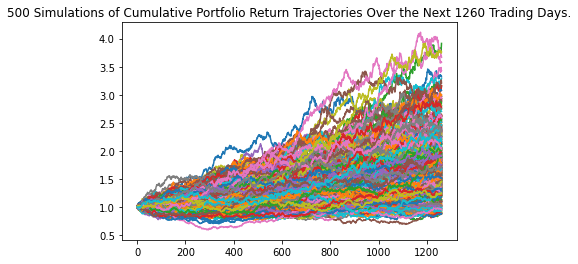

In [299]:
# Plot simulation outcomes
five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

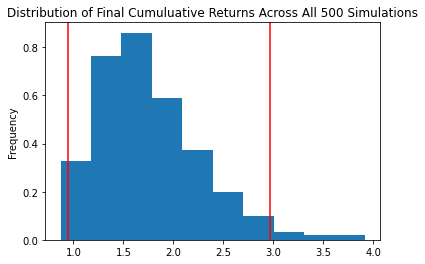

In [300]:
# Plot probability distribution and confidence intervals
five_year.plot_distribution()

In [301]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_summary = five_year.summarize_cumulative_return()
# Print summary statistics
print(five_year_summary)

count           500.000000
mean              1.750507
std               0.527670
min               0.871341
25%               1.356444
50%               1.673634
75%               2.030427
max               3.915155
95% CI Lower      0.945687
95% CI Upper      2.969662
Name: 1260, dtype: float64


In [302]:
# Set initial investment
investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_summary[8]*investment, 2)
ci_upper_five = round(five_year_summary[9]*investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18913.75 and $59393.25


### Ten Years Retirement Option

In [310]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)


In [312]:
# check portfolio data tables
print(df_stock_data)

                              AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.65  3480303   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.3700  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114

In [304]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/heianmac/Desktop/USYD-VIRT-FIN-PT-09-2022-U-LOLC/05-APIs/Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995388,0.995616,1.004697,0.999161,1.010404,0.994328,1.006822,0.998442,1.002309,0.996141,...,1.015951,0.991869,0.997452,0.988986,1.008799,0.988789,0.998563,0.996919,1.018379,1.006557
2,1.004530,1.000639,1.014503,0.993864,1.013219,0.993208,0.987453,1.001294,1.000127,0.996115,...,1.020903,1.002471,0.997357,0.981586,1.024379,1.005493,0.998552,0.987172,1.021202,1.014285
3,1.012574,1.001329,1.007280,0.982946,1.006900,0.985734,0.990522,1.002969,1.006855,0.997745,...,1.019375,1.006578,0.982761,0.973977,1.037585,1.002795,0.985846,0.980689,1.030603,0.997828
4,1.014750,0.988390,1.011732,0.982176,1.019355,0.974723,0.993176,1.010545,1.001568,1.005984,...,1.027737,1.014764,0.983043,0.975869,1.052327,0.998071,0.987460,0.992180,1.031509,0.988531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.096006,4.533180,5.571224,2.523924,5.117994,3.155463,1.780412,3.855424,2.860402,2.340570,...,4.902505,1.361567,6.902847,4.144896,3.330329,1.503809,2.252720,3.411829,5.198640,3.882614
2517,4.050150,4.568070,5.619531,2.542256,5.044227,3.161629,1.793024,3.878031,2.906719,2.338863,...,4.855355,1.373226,6.921131,4.113995,3.315629,1.491246,2.232648,3.414731,5.164682,3.921469
2518,4.062861,4.611807,5.641615,2.563961,5.045234,3.113286,1.795080,3.896020,2.929986,2.340337,...,4.868153,1.374414,6.904404,4.097632,3.284844,1.493551,2.269501,3.436614,5.156723,3.939637
2519,4.128013,4.666972,5.663412,2.575029,5.093310,3.104158,1.780520,3.936977,2.903889,2.349188,...,4.900630,1.402341,6.964758,4.046959,3.284972,1.507472,2.285250,3.441715,5.176028,3.932812


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

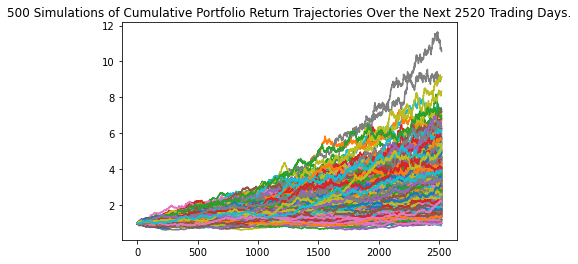

In [305]:
# Plot simulation outcomes
ten_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

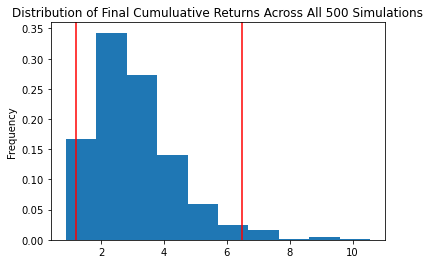

In [306]:
# Plot probability distribution and confidence intervals
ten_year.plot_distribution()

In [307]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_summary = ten_year.summarize_cumulative_return()
# Print summary statistics
print(ten_year_summary)

count           500.000000
mean              3.083185
std               1.369936
min               0.878301
25%               2.175857
50%               2.826668
75%               3.763847
max              10.557624
95% CI Lower      1.210550
95% CI Upper      6.487078
Name: 2520, dtype: float64


In [308]:
# Set initial investment
investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_summary[8]*investment,2)
ci_upper_ten  = round(ten_year_summary[9]*investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $24210.99 and $129741.56


In [ ]:
## with a monthly salary of $12000 and investment of $20000 into higher risk SPY stocks for ten years, 
## and bonds, in a Stocks to Bonds ratio of 70% stocks and 30% bonds. We see the yeild is in the 
## range of $24210.99 and $129741.56 for ten year investment with the plot